# Lojistik Regresyon

    Lojistik regresyonun genel amacı, sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi doğrusal olarak modellemektir.

<p align="center">
  <img src="grafikler/LR_1.png" height=150 >
</p>

    Z doğrusal regresyon denkleminin sonucu Sigmoid fonksiyona yazıldığında, Sigmoid fonksiyonu 0 ve 1 arasında bir olasılık değeri verir. Bu olasılık değerine göre 1 veya 0 sınıf ataması yapılır. Sınıf ataması yapılırken 1 sınıfına ait olma olasılığı hesaplanır.

Sigmoid Fonksiyonuna detaylıca bakmak isterseniz:

https://bilgisayarkavramlari.com/2008/11/02/sigmoid-fonksiyon/


https://tr.wikipedia.org/wiki/Sigmoid_i%C5%9Flevi

Bağımlı değişkenin 1 ve 0'lardan oluştuğu durumlarda, Lineer regresyon yöntemlerinden elde edilen tahmin değerlerinin her zaman 1 ve 0 arasında olması her iş probleminde mümkün değildir. Bu sebeple **Sigmoid fonksiyonu z doğrusal formunun değerlerini 1 ve 0 arası değerlere eşler.**

<p align="center">
  <img src="grafikler/LR_2.png" height=350 >
</p>

    Yukarıda, "Sınıf ataması yapılırken 1 sınıfına ait olma olasılığı hesaplanır." dedik bu ifadeyi biraz açalım.

Yukarıdaki Z denklemi Linear Regresyon denklemidir. Bağımsız değişkenler x1, x2, x3, ... xp ile gösterilmiş, intercept "b" ile ve bağımsız değişkenlerin katsayıları ise w1, w2, w3, ... w4 ile gösterilmiştir.

Yukarıdaki ****y_hat = P(Y = 1 | X = x)**** ifadesini açıklayacak olursak;
* X = x; ifadesi ile X bağımsız değişkenleri değerlerini aldığında,
* Y = 1; ifadesi ile Y bağımlı değişkeninin 1. sınıfının (buradaki birinci sınıf 1 veya True değeri) gerçekleşme olasılığıdır.

Örnek olarak diyelim ki titanik verisindeki gibi hayatta kaldı, kalamadı; diabet veri setindeki gibi bir kişi hasta veya hasta değil gibi sınıflandırmalar olsun, ve bizim y_hat değerimiz yani fonksiyonun ürettiği değer 0.78 olsun. Bu değer ilgili problemdeki 1 sınıfının gerçekleşmesi olasılığıdır.

Örneğimizden devam edersek; titanik veri seti açısıdan %78 ihtimalle ilgili özellikleri gösteren kişi kurtulacaktır, diabet veri setinden düşünecek olursak %78 ihtimalle ilgili özellikleri taşıyan kişi diabet hastasıdır diyeceğiz.

    Sonuç olarak bu olasılıklar açısından bir eşik değer belirlenerek, olasılığın bu eşik değerden yukarıda olursa 1 sınıfına, aşağıda olursa 0 sınıfına ait olacağı şeklinde tahminler yapılacaktır.

## Logistic Regression için Gradient Descent

    Gradient Descent (Gradyan Azalma), rastgele alınan değişkenlerle başlayarak global minimum değerine ulaşmayı amaçlayan en popüler optimizasyon algoritmalarından biridir. Lojistik Regresyon kapsamında, Gradient Descent ile iterasyonlarda kullanılmak üzere, Cost Fonksiyonu üzerinden elde edilen J(θ) değerlerine ulaşılır:

J(θ) yine lineer regresyondaki gibi bir cost (hata şeklinde de adlandırılabilir.) fonksiyonudur. Lakin buradaki cost fonksiyonumuz lineer resgresyondan (Lineer regresyonda MSE idi) farklı olarak **Log Loss** fonksiyonudur.

<p align="center">
  <img src="grafikler/LR_3.png" height=150 >
</p>

* hₒ(x_i) **tahmin edilen** değerleri, y_i değerleri ise **gerçek değerleri** ifade etmektedir.

* Her bir gözlem birimi tek tek gezilerek cost hesaplanır.
* Log loss fonksiyonu içerisindeki hₒ(x_i) ifadesi ise **bağımlı değişkenin 1 sınıfının tahmin edilen gerçekleşmesi olasılığıdır.** 

**Log Loss formulü iki kısımdan oluşmaktadır.**;

Birinci Kısım;

        -( y_i * log(hₒ(x_i)) )

İkinci Kısım ise;

        (1-y_i) * log(1-hₒ(x_i))


In [1]:
# Bu ifadeye Çapraz Entropi Fonksiyonu da denir. (Cross-Entropy Loss Function) 
# Çapraz entropinin ne demek olduğunu birazdan inceleyeceğiz.

Formulümüzü biraz daha detaylı inceleyelim;

In [2]:
# Formulümüzü bir hatırlayalım;

# -( y_i * log(hₒ(x_i)) ) + (1-y_i) * log(1-hₒ(x_i))
# ¯¯¯¯¯¯ 1. Kısım ¯¯¯¯¯¯¯ + ¯¯¯¯¯¯¯ 2. Kısım ¯¯¯¯¯¯¯

1. Seneryo

Diyelim ki herhangi bir gözlem için bağımlı değişkenimizin **gerçek değeri 1** olsun ve bizim **tahmin değerimiz ise 0.80** olsun;

In [3]:
# - ( 1 * log(0.80) ) + (1 - 1) * log( 1-0.80 )
# ¯¯¯¯ 1. Kısım ¯¯¯¯¯ + ¯¯¯¯¯¯ 2. Kısım ¯¯¯¯¯¯¯

# Yukarıda 2. Kısımdan zaten 0 değeri gelecek ve Log Loss fonksiyonumuzda 1. kısımın sonucu çıkacak.

2. Seneryo

Diyelim ki herhangi bir gözlem için bağımlı değişkenimizin **gerçek değeri 0** olsun ve bizim tahmin değerimiz 0.20 olsun; 

In [4]:
# - ( 0 * log(0.20) ) + (1 - 0) * log( 1-0.20 )
# ¯¯¯¯ 1. Kısım ¯¯¯¯¯ + ¯¯¯¯¯¯ 2. Kısım ¯¯¯¯¯¯¯

# Yukarıda 1. Kısımdan zaten 0 değeri gelecek ve Log Loss fonksiyonumuzda 2. kısımın sonucu çıkacak.

    Yukarıdaki açıklamalardan cost (hata) fonksiyonunun nasıl hesaplandığını detaylıca gördük. Dolayısıyla biz bu çıktıların en az (minimum) olmasını isteriz.

Şimdi gelelim entropi kısmına; 

Entropi ne kadar yüksek olursa çeşitlilik o kadar fazla olacaktır. **Dolayısıyla gerçek değer ve tahmin edilen değer açısından entropinin düşük yani çeşitliliğin az olması istenir.** 

* **Eğer bir sınıfa ait olmanın tahmin edilen gerçekleşme olasılığı ne kadar yüksekse entropi o kadar düşük olacaktır.**

    Sonuç olarak: Gerçek değerler ile o gerçek değerlerin gerçekleşmesi olasılığı birbirine ne kadar yakın ise Loss Değeri (kayıp değeri) o kadar küçük olacaktır.

## Sınıflandırma Problemlerinde Başarı Değerlendirme

Örnek olarak müşteri terk veri seti incelendiğinde, müşterilerin terk etme durumu bağımlı değişken olan Churn altında 1 ve terk etmeme durumu 0 ile ifade edilmiştir. 

Bu kapsamda kurulmak istenilen model, özellikleri verilen müşterilerin terk etme/etmeme durumunu tahmin etmek üzerinedir. 

Bu modelde başarı, ilgili gözlem birimi için tahmin edilen ve gerçek değerin eşleşmesidir.

<p align="center">
  <img src="grafikler/LR_4.png" height=350 >
</p>

### Confusion Matrix: (Karmaşıklık Matrisi)

Model kurulduktan sonra ortaya çıkan tahmin edilen değerler sonucunda,
Tahmin edilen değerin ve Gerçek değerin eşleştiği gözlem birimleri:

* **1 sınıfı** için **True Positive (TP)**
* **0 sınıfı** için **True Negative (TN)**

Tahmin edilen değerin ve Gerçek değerin eşleşmediği gözlem birimleri:

* **1 sınıfı** için **False Positive (FP)** (İstatistikte 1.tip hata olarak betimlenir)
* **0 sınıfı** için **False Negative (FN)** (İstatistikte 2.tip hata olarak betimlenir)

<p align="center">
  <img src="grafikler/LR_5.png" height=200 >
</p>

* **Accuracy:** Doğru sınıflandırma oranıdır. **(TP+TN)/(TP+TN+FP+FN)**

    İncelenen sınıflandırma problemi dengeli sınıf dağılımına sahipse Accuracy metriği kullanılabilir. Sınıf dağılımı dengesizse, sınıf sayısı düşük olan sınıfı yakalama problemi oluşur.

##### Sınıf dağılımları dengesiz olduğu durumlarda Accuracy kullanılmaz. Bu durumlarda ise Precision ve Recall değerleri incelenir.

* **Precision:** Pozitif sınıf (1) tahminlerinin başarı oranıdır. **TP/(TP+FP)**
 
 Tahmin edilen değerlerde **ne kadar başarılı olunduğunun** ölçüsüdür. Tahmin edilen pozitif sınıfların (1 olarak tahmin edilen sınıfların) gerçekte ne kadarının pozitif olduğunu gösterir. 1. tip hata ile ilgilenilir. Tahminlerin başarısına odaklanır.

<p align="center">
  <img src="grafikler/LR_6.png" height=200 >
</p>

* **Recall:** Pozitif sınıfın (1) doğru tahmin edilme oranıdır. **TP/(TP+FN)**

Tahmin edilen pozitif sınıfların **ne kadarının doğru tahmin edildiğini** betimler. 2. tip hata ile ilgilenir. Önemli bir ölçüdür. Gözden kaçırmaların maliyeti hakkında bilgi verir. Gerçekleri yakalama başarısına odaklanır.

<p align="center">
  <img src="grafikler/LR_7.png" height=200 >
</p>

* **F1 Score:** Precision ve Recall değerlerinin harmonik ortalamasıdır.

2*(Precision*Recall)/(Precision+Recall)

Hem Precision Hem de Recall değerinin etkisini tutmaktadır.

### Sınıflandırmalarda Olasılık Eşik Değeri: (Classification Threshold)

Sınıflandırma modellerinin başarı değerlendirme süreçlerinde, başarı ölçüm metriklerine geçmeden önce, bağımlı değişkenin tahmin edilmesi gerekmektedir. 

Bu kapsamda sigmoid fonksiyonu kullanılarak ulaşılan olasılık değerlerinin, belirlenen bir eşik değerin üstünde veya altında olması durumuna göre tahmin değerleri elde edilir.

Bu eşik değere **Classification Threshold** denir.

    Bir örnek üzerinde gözlemleyelim:

<p align="center">
  <img src="grafikler/LR_8.png" height=300 >
</p>

In [5]:
# Bu örnekte birinci sınıfın gerçekleşme olasılığına ilişkin eşik değeri 0.50 olarak belirledik.(Ön tanımlı değerdir.)

# Her zaman olmasa da bu örnek için eşik değerin yükseltilmesi Accuracy’i düşürecektir.
# Öte yandan eşik değerin düşürülmesi ise Accuracy değerini yükseltecektir.

# Model bazında optimal çıktıyı bulmak gerekir.

    Özetle: Belirlenen eşik değere göre, tahmin edilen değerlere ulaşılır. Ardından başarı ölçüm metriklerince değerlendirilir. Bu kapsamda eşik değeri değiştikçe başarı ölçüm değerleri de değişkecektir. Dolayısıyla olası tüm eşik değer değişimleri göz önüne alınarak hesaplanmalar yapılması gerekmektedir. 

### Sınıflandırma Problemlerinda Başarı Değerlendirme - ROC Curve -

<p align="center">
  <img src="grafikler/LR_5.png" height=200 >
</p>

Bu kısımı anlayabilmek için biraz tekrar yapalım;

* **Precision:** Pozitif sınıf (1) tahminlerinin başarı oranıdır. **TP/(TP+FP)**
* **Recall:** Pozitif sınıfın (1) doğru tahmin edilme oranıdır. **TP/(TP+FN)**

Yukarıdaki 2 metriki iyi bilmeliyiz.

    Yukarıdaki iki metriğe ek olarak;

* Recall metriğine **Sensitivity veya True Positive Rate (TPR)** denir.


* **Specifity - True Negative Rate (TNR):** Negatif sınıf (0) değerini tahmin başarısıdır. **TN/(FP+TN)**
* **False Positive Rate (FPR):** Negatif sınıf (0) değerine pozitif sınıf (1) deme oranıdır. **FP/(FP+TN)**

    Bir yukarıdaki başlıkta gördük ki, eşik değer değişimleri; confusion matrisde dolayısıyla accuracy, precision, recall vb. metriklerimizde değişikliğe neden olmaktadır.

Eşik değerin düşürülmesi, doğal olarak tahmin edilen 1'lerimizin artmasına neden olur.

    Tahmin edilen 1'ler True Positive ve False positive olmak üzere 2 sınıftan oluşmaktadır. Yani eşik değerin düşmesi hem True Positive hem de False positive'ler de artışa sebep olur.

* True Positive'lerdeki artış bizim recall (sensitivity) metriğimizi arttırır ki bu bizim için iyi bir şeydir.
* Lakin False Positive'lerdeki artış bizim işimize gelmeyen bir şeydir. False positivelerdeki artış ise False positive rate (FPR) ile ölçülür.

##### NOT !!! : False Positive Rate bazı yerlerde (1-Specifity olarak da gösterilir.) Bu sebeple yukarıda Specifity metriğinden bahsettik.

     Nihai Çıktı:
     
     Yani sonuç olarak biz sensitivity (TPR) metriğimizin yüksek, False Positive Rate (FPR) değerimizin düşük olmasını isteriz.

In [6]:
# Nihai çıktıdan yola çıkarak;

# Bir grafik oluşturulmuş olsun, bu grafiğin;

# x ekseninde FPR (1- specificity) metriğini, 
# y ekseninde ise TPR metriğini ölçümleyelim,

# Buna göre grafiğimiz aşağıdaki gibi olurdu.

<p align="center">
  <img src="grafikler/LR_9.jpg" height=400 >
</p>

A noktası bizim için istenen en mükemmel noktadır. Sensitiviy 1, FPR ise 0'dır.

Yukarıda da bahsetmiştik, eşik değerlerin değişiminden dolayı metriklerde, dolayısyla TPR ve FPR'lerde değişim olmaktadır. Bu değişimleri birleştirdiğimiz zaman ortaya **ROC eğrisi** çıkar.

Bu ROC eğrisi modelden modele göre farklı şekillerde olabilirken, örneğin yukarıdaki grafikteki gibi B ve C eğrilerine benzeyebilir.

In [7]:
# C eğrisinin özel bir durumu vardır;

# C eğrisindeki her bir noktada True Positive Rate ve False Positive Rate bir birine eşittir.
# Eğer ki rasgele olarak tahmin yaparsak, 0 ve 1'lerin zaten yarısını bilmeyi bekleriz. (Bknz: Büyük Sayılar Kanunu)
# Dolayısıyla karmaşıklık matrisimiz şöyle olur;                            

<p align="center">
  <img src="grafikler/LR_10.png" height=400 >
</p>

In [8]:
# Yani gerçek positive (1) değerlerin ancak yarısını doğru tahmin edebiliriz.
# Gerçek Negative (0) değerlerinin de ancak yarısını doğru tahmin edebiliriz.

# 2. tablodaki değerlerden dolayı, True Positive Rate ve False Positive Rate birbirine eşit olur.
# True Positive Rate ile False Positive Rate'in birbirine eşit olduğu çizgi C çizgisiydi.

    Yani biz model kurmadan rasgele bir tahminde bulunduğumuzda ROC çizgimiz zaten C çizgisi gibi olmaktadır.

TPR'in FPR'den büyük olduğu yer de random guess çizgisinin üst kısmıdır.

<p align="center">
  <img src="grafikler/LR_11.png" height=500 >
</p>

Random Guess doğrusunun üstünde kalan ROC eğrileri, Perfect Classification'a doğru iç bükeyleştikçe başarı oranının artması beklenir.

    ROC eğrisi ile Random Guess Doğrusu arasındaki alana Area Under Curve (AUC) denir. AUC, “ROC Eğrisi altındaki alan” anlamına gelir. Bu metrik ROC eğrisinin sayısal bir şekilde ifade edilişidir. AUC, tüm olası sınıflandırma eşikleri için toplu bir performans ölçüsüdür. AUC değerinin yüksek olması sınıflandırmanın iyi yapıldığı anlamına gelir.

### Log Loss

<p align="center">
  <img src="grafikler/LR_12.png" height=100 >
</p>

* LOG loss ifadesi hem modelin başarısı, hem de optimizasyon için değerlendirilen bir metriktir. 
* Hiperparametreler ve ağırlıklar bulabilmek için optimize edeceğimiz parametredir.

### Problem ve Veri Setinin Hikayesi

In [9]:
# İş Problemi:

# Özellikleri belirtildiğinde kişilerin diyabet hastası olup
# olmadıklarını tahmin edebilecek bir makine öğrenmesi
# modeli geliştirebilir misiniz?

Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde yapılan diyabet araştırması için kullanılan verilerdir. 768 gözlem ve 8 sayısal bağımsız değişkenden oluşmaktadır. Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

In [10]:
# Değişkenler

# Pregnancies: Hamilelik sayısı
# Glucose: Glikoz.
# BloodPressure: Kan basıncı.
# SkinThickness: Cilt Kalınlığı
# Insulin: İnsülin.
# BMI: Beden kitle indeksi.
# DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.
# Age: Yaş (yıl)
# Outcome: Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)

In [11]:
# Model Kurma ve Tahmin Aşamaları

# 1. Exploratory Data Analysis
# 2. Data Preprocessing
# 3. Model & Prediction
# 4. Model Evaluation
# 5. Model Validation: Holdout
# 6. Model Validation: 10-Fold Cross Validation
# 7. Prediction for A New Observation

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate

In [13]:
# Önceki bölümlerden bir takım fonksiyonları tekrardan tanımlayalım;

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

### 1. Keşifçi Veri Analizi (EDA)

In [14]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
##########################
# Target'ın Analizi
##########################

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

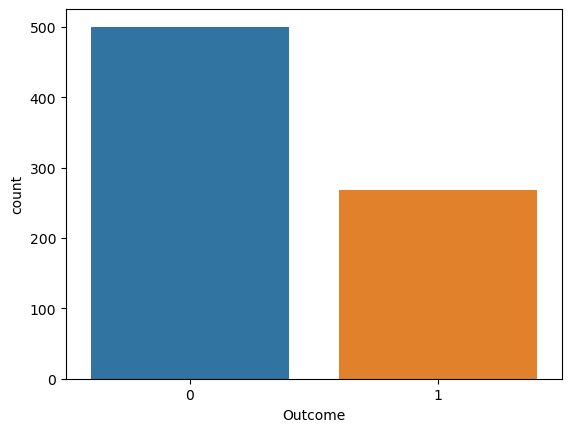

In [16]:
# Bağımlı değişkenin sınıf bilgilerini sütün grafiği haline getirelim;

sns.countplot(x="Outcome", data=df)
plt.show()

In [17]:
# Bağımlı değişkenin sınıf bilgilerinin oranına bakmak istersek;

100 * df["Outcome"].value_counts() / len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [18]:
##########################
# Feature'ların Analizi
##########################

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Bağımsız değişkenleri bir özetlersek;

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


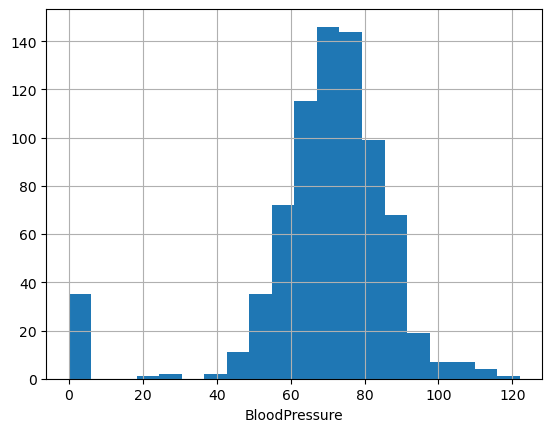

In [20]:
# Yukarıda sayısal değişkenlerin özet tablosuna baktık;
# Bu sayısal değişkenleri görselleştirmek istersek;

# Sayısal değişkenleri görselleştirmek istersek; 
# Kutu grafik ve histogram olmak üzere, öncelikli olarak aklımıza iki grafik türünün gelmesi gerekir.

df["BloodPressure"].hist(bins=20)
plt.xlabel("BloodPressure")
plt.show()


In [21]:
# Yukarıdaki işlemi fonksiyonlaştırıp, numerik sütunları görebileceğimiz bir fonksiyon tanımlayalım;

def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

# "block=True" argümanını eklememizin sebebi, peş peşe göndereceğimiz grafiklerin üst üste gelmemesini istiyoruz.
# Jupyter Notebook da böyle bir problem olmasa da başka IDE'lerde olabilir.

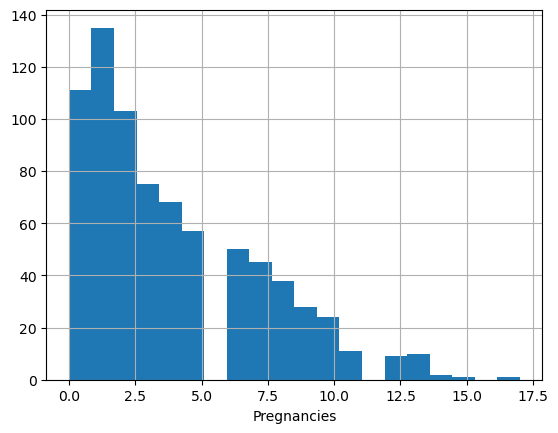

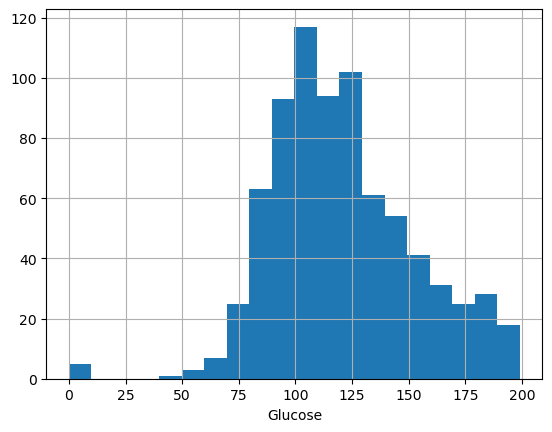

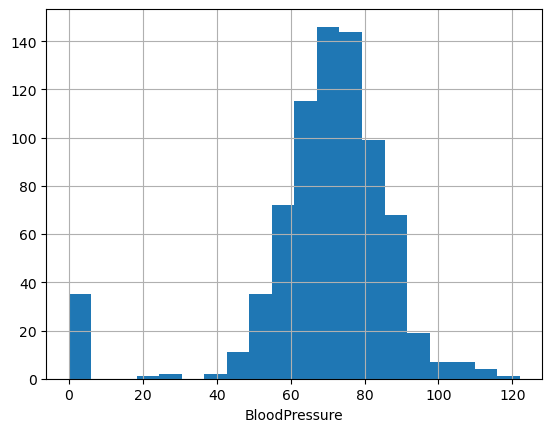

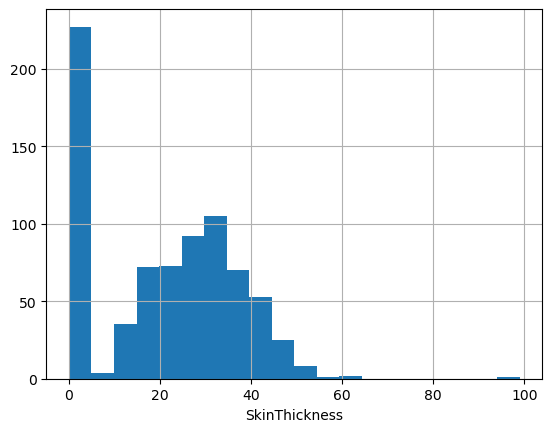

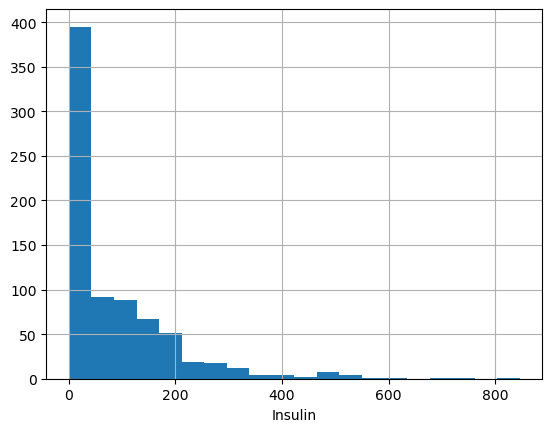

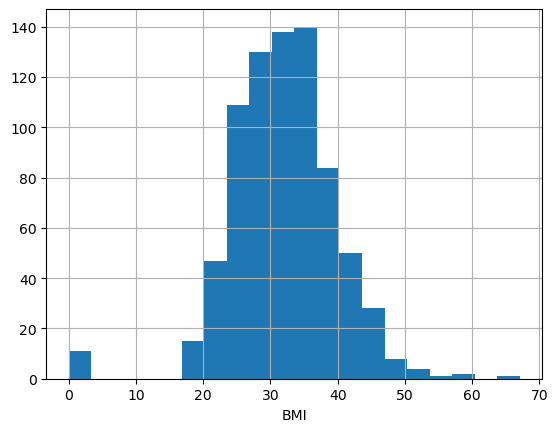

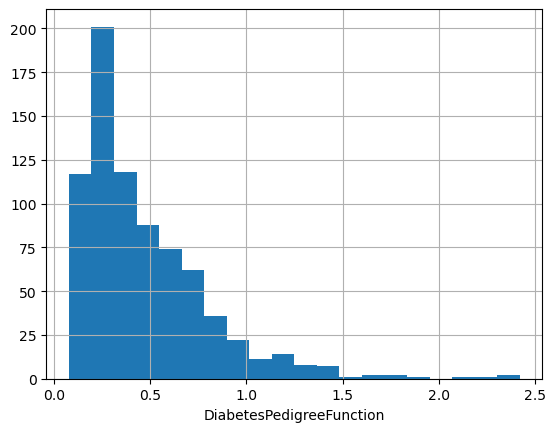

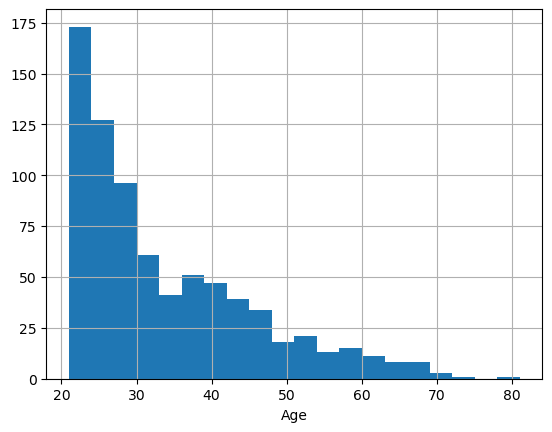

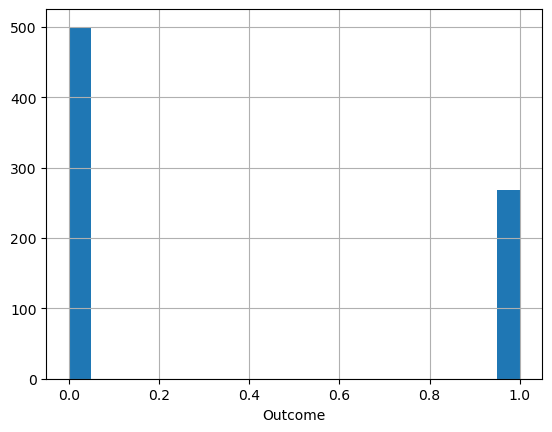

In [22]:
for col in df.columns:
    plot_numerical_col(df, col)

In [23]:
# Outcome çıktısını istemezsek;

cols = [col for col in df.columns if "Outcome" not in col]

In [24]:
##########################
# Target vs Features
##########################

df.groupby("Outcome").agg({"Pregnancies": "mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


    Yukarıda görüyoruz ki diyabet hastası olanların hamilelik sayısının ortalaması 4.86 iken, hasta olmayanların ortalama hamilelik sayısı ise 3.29'dur.

In [25]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [26]:
# Yukarıdaki cols'da döngü döndürüyoruz;

for col in cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




### 2. Veri Ön İşleme

In [27]:
df.shape

(768, 9)

In [28]:
# Eksik veri var mı bir ona bakalım;

df.isnull().sum()

# Eksik veri olmadığını görüyoruz.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

    Ama bakalım gerçekten öyle mi?

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


    Yukarıya bakıldığında hamilelik sayısının minimum değerinin 0 olduğu gözüküyor. Bu pek tabi anlaşılabilir.
    Lakin, "BloodPressure" yani kan basıncının 0 olduğunu görüyoruz, yani kalbin atmadığı anlamına mı geliyor bu?
    Ayrıca; Insulin, BMI (Vücut Kitle Indeksinin), SkinThickness (Deri Kalınlığının), Glucose değerlerinin de sıfır olduğunu görüyoruz.

##### NOT!!! : Anlıyoruz ki bu veri setindeki eksik değerler "0" ile doldurulmuş.

Lakin biz veri ön işleme eğitiminde olmadığımız için bu kısımları düzeltmek adına bir aksiyon almayacağız. Lakin bu durumların da farkında olunması gerekir.

Ayrıca anlıyoruz ki veri analizinde **"domain knowledge"** önemli bir yere sahiptir.

In [30]:
# Aykırı değer var mı bakalım;

for col in cols:
    print(col, check_outlier(df, col))

# Sadece insulin değişkeninde aykırı değer olduğu gözüküyor.

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [31]:
# Aykırı değerleri eşik değerler ile değiştirelim;

replace_with_thresholds(df, "Insulin")

In [32]:
# Aykırı değerleri bir daha kontrol edelim;

for col in cols:
    print(col, check_outlier(df, col))

# Aykırı değer problemini gözdük.

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


In [33]:
# Veri ön işleme ile ilgili yapılması gereken bir başka şey ise;
# Verinin standartlaştırılmasıdır (scale edilmesidir).

# Doğrusal yöntemlerde, uzaklık temelli yöntemlerde ve gradient descent kullanan yöntemlerde;
# standartlaştırma işlemleri genelde önem taşır.

    Standartlaştırma şu açılardan önemlidir;

* Modellerin, modelde kullanılacak değişkenlere eşit derecede yaklaşması gerekmektedir. (Örneğin değer olarak büyük değişkenlerin, değer olarak küçük değişkenlerden daha önemli olmadığını modele ifade etmemiz gerekir.)

* Kullanılan parametre tahmin yöntemlerinin daha hızlı ve daha doğru tahminlerde bulunması için değişken standartlaştırmayı tercih ederiz.


In [34]:
# Burada biz robustscaler ile değişkenlerimiz scale edeceğiz;

# Robust Scaler ile standart scaler arasıdaki farkı bir hatırlayacak olursak;
# Robust Scaler aykırı değişkenlerden daha az etkilenmektedir.


# Standart scaler hesaplanırken kullanılan;
# ortalama ve standart sapma değişkenin değerleri (gözlemler) kullanılarak hesaplandığı için,
# hem ortalama hem de standart sapma aykırı değerlerden etkilenen parametrelerdir.

# Şimdi aşağıda değişkenlerimi scale edelim;

for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

In [35]:
# Verimize hızlı bir göz atalım;

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1


### 3. Modelleme ve Tahmin Etme

In [36]:
# Modele belirtmeden önce, bağımlı ve bağımsız değişkenlerimizi tanımlayalım;

y = df["Outcome"]

X = df.drop(["Outcome"], axis=1)

In [37]:
# Modelimizi kurup fit edelim;

log_model = LogisticRegression().fit(X, y)

In [38]:
# Modelin sabitine erişmek istersek;

log_model.intercept_

array([-1.23439588])

In [39]:
# Modelin katsayılarına erişmek istersek;

log_model.coef_

array([[ 0.59906785,  1.41770936, -0.23152362,  0.01973855, -0.14571255,
         0.81741997,  0.35522795,  0.25655154]])

In [40]:
# Şimdi önceki verielrden yola çıkarak tahminde bulunalım;

y_pred = log_model.predict(X)

In [41]:
# Tahmin sonuçlarımız;

y_pred[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [42]:
# Gerçek değerler;

y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

### 4. Model Başarı Değerlendirme

In [43]:
# Karmaşıklık matrisini görebilmek için bir fonksiyon tanımlayalım;

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    # "annot=True" argümanı ile ilgili değeri karenin ortasına yazdırıyoruz.
    # "fmt= argümanı" ile de gösterilecek sayının formatını giriyoruz.
    
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

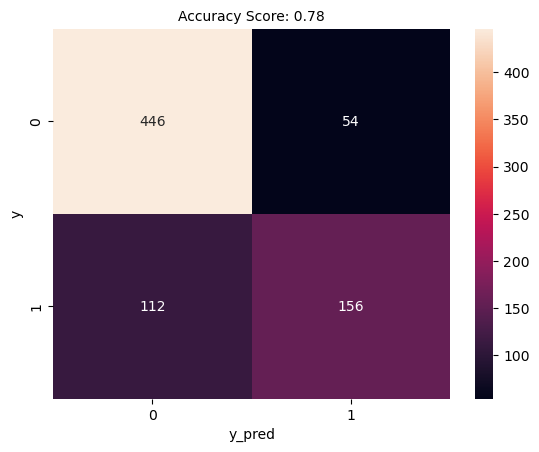

In [44]:
plot_confusion_matrix(y, y_pred)

In [45]:
# İlgili metriklerin hesaplandığı fonksiyonumuzu çağıralım;

print(classification_report(y, y_pred))

# Biz tabloyu "1" sınıfının başarı metriklerine göre yorumluyor olcağız.
# support ise frekansdır, "1" ve "0" gruplarının görülme sıklığıdır.

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



                           Precision                                             Recall

<p align="left">
  <img src="grafikler/LR_6.png" height=150 >
  <img src="grafikler/LR_7.png" height=150 >
</p>


    Yukarıdaki tablloya baktığımızda "1" sınıfının precision değerinin 0.74 olduğunu görüyoruz, yani bu ne demek?

* 1 olarak yaptığımız tahminlerin %74'ü başarılıdır.

    Recall değeri ise 0.58'dir.

* Yani 1 olanları %58 oran ile doğru sınıflandırabilmişiz.

In [46]:
# Aşağıdaki tablonun diğer satırlarını da yorumlayalım;

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



In [47]:
# Yukarıda 1 grubuna ait olan çıktıları yorumlayacağımızı söylemiştik.
# Çıktılarımızı 0 grubuna göre de yorumlayabiliriz. Lakin yaygın olan 1 sınıfına ait olan çıktıları yorumlamaktır.

# Eğer ki ortalama bir yorumlama yapmak istersek ise;

# "macro avg", ilgili metriklerin aritmetik ortalaması iken;
# "weight avg", ilgili metriklerin ağırlıklı ortalamasıdır.


##### Modelimizin başarısına bir de ROC eğrisi ile bakalım.

In [48]:
# ROC AUC
y_prob = log_model.predict_proba(X)
y_prob

# ".predict_proba()" metodunun çıktısı, ikili listeler halindedir.
# listenin birinci elemanı "0" çıktısının gerçekleşme olasılığını ifade ederken,
# listenin ikinci elemanı "1" çıktısının gerçekleşme olasılığını ifade eder.

array([[0.28359381, 0.71640619],
       [0.94894448, 0.05105552],
       [0.21158782, 0.78841218],
       ...,
       [0.82688728, 0.17311272],
       [0.71234466, 0.28765534],
       [0.92538489, 0.07461511]])

In [49]:
# Bizim için önemli olan bu case'de "1" çıktısını gerçekleşme olasılığıdır.
# Bu sebeple listenin 2. elemanına ihtiyacımız vardır.

y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

# "roc_auc_score()" fonksiyonu ile ROC eğrisi altında kalan alan hesaplanılır.
# Bu fonksiyona da ilk önce gerçek y daha sonra ise tahmin edilen y değerleri olmak üzere iki parametre gönderilir.

0.8393955223880598

    Yukarıda modelimizi kurarken kullandığımız veri seti üzerinde bir bölme işlemi gerçekleştirmedik. Yani modeli eğittiğimiz veri üzerinde test işlemlerini gerçekleştirdik. Bu sebeple, modelimizi doğrulama ihtiyacı ortaya çıktı.

### 5. Model Doğrulama (Model Validation)

    Holdout

In [50]:
# Veri setimizi test ve train olarak %80 Train, %20 Test olacak şekilde ikiye bölelim.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=17)

# Random state daha sonra bu işlemleri deneyecek olan kişilerin aynı sonucu alması için yazılmış bir parametredir.

In [51]:
# Şimdi train veri seti ile modelimizi bir kez daha fit edelim;

log_model = LogisticRegression().fit(X_train, y_train)

In [52]:
# Kurulan modele göre test verimizi tahmin edelim;

y_pred = log_model.predict(X_test)

In [53]:
# Tahmin edilen değerlerin "1" sınıfına ait olma olasılıklarını hesaplayalım;

y_prob = log_model.predict_proba(X_test)[:, 1]

In [54]:
# Model çıktılarını kontrol edelim;

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.79      0.53      0.63        57

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



In [55]:
# Veri Setini Test ve Train diye bölmeden önce sonuçlar;  
                                                         
#               precision    recall  f1-score   support             
                                                         
#            0       0.80      0.89      0.84       500     
#            1       0.74      0.58      0.65       268     
   
#     accuracy                           0.78       768
#    macro avg       0.77      0.74      0.75       768
# weighted avg       0.78      0.78      0.78       768


# Veri Setini Test ve Train olarak ikiye böldükten sonra sonuçlar;
#               precision    recall  f1-score   support

#            0       0.77      0.92      0.84        97
#            1       0.79      0.53      0.63        57

#     accuracy                           0.77       154
#    macro avg       0.78      0.72      0.73       154
# weighted avg       0.78      0.77      0.76       154

    Recall 0.58'den, 0.53'e düşmüş durumda, bu konuda bir eleştiri gelebilir. Yani modelimi test ve train olarak ikiye böldükten sonra modelimin başarısında bir azalma olmuştur.

/Users/emintaskent/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


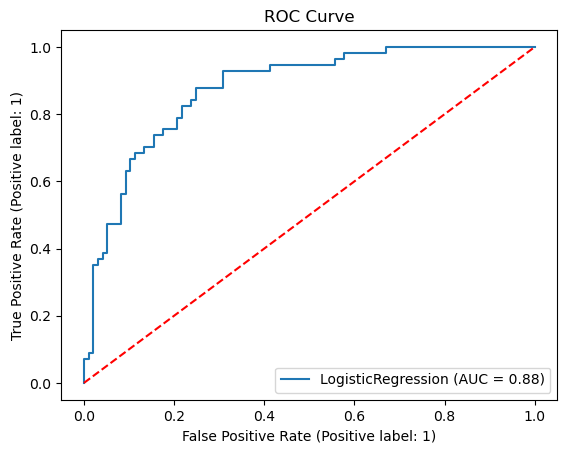

In [56]:
# ROC Curve'i de çizdirmek istersek;

plot_roc_curve(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Model Doğrulama: 10 Katlı Çapraz Doğrulama (10-Fold Cross Validation)

Bir önceki bölümde veri setinde train-test ayrımı yaptık. Lakin verinin hangi 80-20'lik bölümünün alındığını tam olarak bilemiyoruz. Bu durum bizim için soru işareti oluşturabilecek bir noktadır.

Bir yukarıdaki kısımda **Holdout yöntemi** ile yaptığımız doğrulamayı bu bölümde 10 katlı olarak yapacağız. Katlı olarak model çapraz doğrulama yapmak ne demektir?

Veri seti 10 parçaya bölünür 9 parçası ile model kurulur ve 1 parçası ile test yapılır, daha sonra test parçası bu 10 parçanın tamamı olacak şekilde bu işlem devam eder. Bu süreç sonucunda çıkan bütün test hatalarının ortalaması alınır.

In [57]:
# Bağımlı ve bağımsız değişkenlerimizi tanımlayalım;

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [58]:
# Modelimizi kuralım;

log_model = LogisticRegression().fit(X, y)

In [59]:
# CV fonksiyonu ile cross validation işlemini yapalım;

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

# "cross_validate()" fonksiyonu içerisine modelimizi gönderiyoruz,
# Bağımsız ve bağımlı değişkenleri gönderiyoruz,
# daha sonrasında veri setini kaç parçaya böleceğimizi söylüyoruz, (yukarıda 5 dedik, pek tabi 10'a da bölebilirdik.),
# son kısımda ise hangi başarı değerlendirme metriklerini istediğimizi ifade ediyoruz.

In [60]:
# Şimdi modellerin accuracy'lerine bakalım;

cv_results['test_accuracy']

array([0.77272727, 0.74675325, 0.75324675, 0.81699346, 0.77124183])

In [61]:
# Bu accuracy'lerin ortalamasını almak istersek;

cv_results['test_accuracy'].mean()

0.7721925133689839

    Yukarıdaki çıktıyı yorumlamamız gerekirse, bizim modelimizin doğru sınıflandırma oranı %77'dir.

In [62]:
# Modellerin precision değerlerine bakalım;

cv_results['test_precision']

array([0.71111111, 0.64705882, 0.71052632, 0.79069767, 0.73684211])

In [63]:
# Bu precision değerlerinin ortalamasına bakalım;

cv_results['test_precision'].mean()

0.7192472060223519

    Daha önceki işlemlerimizde (veri setini train-test olarak bölmeden kurduğumuz model ve eri setini train-test olarak bölerek kurduğumuz modelden bahsediyoruz) precision değeri sırasyıla 0.74 ve 0.77 çıkmıştı. Burada ise ortalamanın 0.71 çıktığını görüyoruz. Bu daha güvenilir bir çıktıdır.

    Yani "1" olarak tahmin ettiklerimizin %71'ini doğru tahmin ediyoruz.

In [64]:
# Recall ortalamasına bakalım;

cv_results['test_recall'].mean()

0.5747030048916841

    Daha önceden 0.58 ve 0.53 bulmuştuk. Şu anda ise ortalama olarak 0.57 buluyoruz.

    Bu şu manaya gelmektedir; gerçekte "1" olan sınıfları tahmin etme başarımız %57'dir.

In [65]:
# F1 score'ların ortalamasına bakalım;

cv_results['test_f1'].mean()

0.6371421090986309

    F1 skoru precision ve recall değerlerinin ortalamasıydı. Diğer sonuçlara yakın olduğunu görüyoruz.

In [66]:
# ROC AUC ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.8327295597484277

In [67]:
######################################################
# Prediction for A New Observation
######################################################

In [68]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [69]:
# Bağımsız değişkenlerimizin olduğu verilerden rasgele birini alığ tahmin etmeye çalışalım;

random_user = X.sample(1, random_state=45)
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,0.4,0.993939,0.666667,0.5625,1.410609,0.795699,0.058824,0.0


In [70]:
log_model.predict(random_user)

# Bu aldığımız rasgele kişi diabettir tahmininde bulundu model.

array([1])